In [2]:
#                                                            1. Data Preparation

In [3]:
import pandas as pd
import numpy as np

file = r"D:\EXCELR\A11.xlsx"
data = pd.read_excel(file, sheet_name='Heart_disease')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
#                                                 2. Exploratory Data Analysis (EDA)

In [6]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
(data==0).sum()

age           0
sex           0
cp            0
trestbps      1
chol        172
fbs         723
restecg       0
thalch        0
exang       516
oldpeak     358
slope         0
thal          0
num         399
dtype: int64

In [8]:
import numpy as np

# Replace invalid zeros
for col in ['trestbps', 'chol']:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].median(), inplace=True)

# Fill missing 'oldpeak' if any
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)

# Verify no missing values left
print(data.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


C:\Users\bunny\AppData\Local\Temp\ipykernel_20564\4187568730.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\bunny\AppData\Local\Temp\ipykernel_20564\4187568730.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [9]:
#     Encoding
data.replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1}, inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

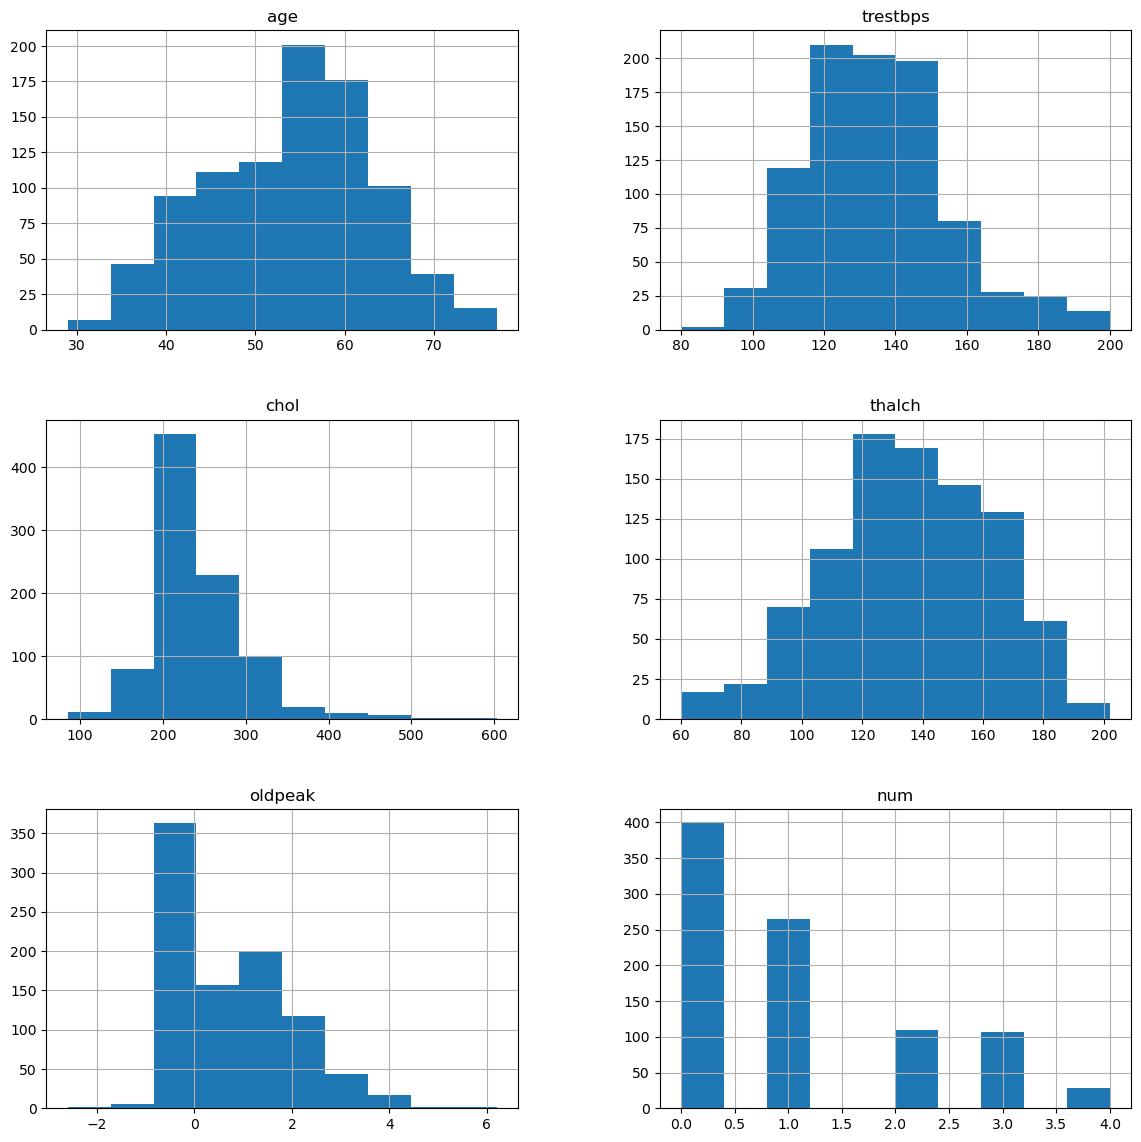

In [10]:
data.hist(figsize=(14,14))

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

co=data.select_dtypes(include=['number']).corr()
co

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.261161,0.017162,-0.328088,0.217942,0.326493
trestbps,0.261161,1.000000,0.109804,-0.131508,0.142559,0.153130
chol,0.017162,0.109804,1.000000,-0.010721,0.007946,0.011257
thalch,-0.328088,-0.131508,-0.010721,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.142559,0.007946,-0.112624,1.000000,0.406078
num,0.326493,0.153130,0.011257,-0.323058,0.406078,1.000000


In [12]:
#                                                        3. Feature Engineering

In [13]:
#      ENCODING TECHNIQUES 

In [14]:
#       Label Encoding ( where there is a natural order )
'''  e.g.
slope = upsloping, flat, downsloping
education = primary, secondary, graduate'''

#       One Hot Encoding ( where there is no order )
''' e.g.
Gender = Male / Female
Color = Red / Blue'''

' e.g.\nGender = Male / Female\nColor = Red / Blue'

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LE=LabelEncoder()
data['slope']=LE.fit_transform(data['slope'])

print("=================Encoding Technique (Label Encoding) ======================")
data.head()

=================Encoding Technique (Label Encoding) ======================


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150,False,2.3,0,fixed defect,0
1,41,Male,atypical angina,135.0,203.0,False,normal,132,False,0.0,1,fixed defect,0
2,57,Male,asymptomatic,140.0,192.0,False,normal,148,False,0.4,1,fixed defect,0
3,52,Male,typical angina,118.0,186.0,False,lv hypertrophy,190,False,0.0,1,fixed defect,0
4,57,Male,asymptomatic,110.0,201.0,False,normal,126,True,1.5,1,fixed defect,0


In [16]:
cat_cols=['sex','cp','restecg','thal']

In [17]:
OH = OneHotEncoder(drop = 'first' , sparse_output = False)

df_enc = pd.DataFrame(OH.fit_transform(data[cat_cols]) , 
                      columns = OH.get_feature_names_out(cat_cols))
data=pd.concat([data.drop(columns=cat_cols) , df_enc] , axis=1)

print("=================Encoding Technique (One Hot Encoding) ======================")
data.head()

=================Encoding Technique (One Hot Encoding) ======================


,age,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,thal_normal,thal_reversable defect
0,63,145.0,233.0,True,150,False,2.3,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,41,135.0,203.0,False,132,False,0.0,1,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,57,140.0,192.0,False,148,False,0.4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,52,118.0,186.0,False,190,False,0.0,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,57,110.0,201.0,False,126,True,1.5,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
#    FEATURE SCALING

In [19]:
#  variables

num_cols=data.select_dtypes(include=['int64','float64']).columns

In [20]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
data[num_cols] = ss.fit_transform(data[num_cols])

print("======================After Standard Scaler ======================")
data.head()

======================After Standard Scaler ======================


,age,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,thal_normal,thal_reversable defect
0,1.006027,0.574079,-0.251462,True,0.524183,False,1.354403,-1.672770,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.771869,-0.833085
1,-1.397560,0.071656,-0.792352,False,-0.147705,False,-0.815718,-0.224843,-0.881977,0.514416,2.122034,-0.536603,-0.228350,0.821752,-0.495522,-0.771869,-0.833085
2,0.350503,0.322867,-0.990678,False,0.449529,False,-0.438305,-0.224843,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.771869,-0.833085
3,-0.195767,-0.782462,-1.098856,False,2.017268,False,-0.815718,-0.224843,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.771869,-0.833085
4,0.350503,-1.184400,-0.828411,False,-0.371668,True,0.599578,-0.224843,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.771869,-0.833085


In [21]:
#                                                              4. Decision Tree Classification:

In [22]:
#  Prepare Target Variable (fix the error!)
# Convert multi-class (0–4) into binary (0 = no disease, 1 = disease)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

In [23]:
#   Split the dataset into training and testing sets (e.g., using an 80-20 split).

x=data.drop(columns='num')
y=data["num"]

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 16)
(182, 16)
(726,)
(182,)


In [25]:
#   Implement a Decision Tree Classification model using a library like scikit-learn.

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100)
model.fit(x_train,y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

print('============================Train Data=====================================')
train_a  = accuracy_score(y_train,y_pred_train)
train_p  = precision_score(y_train,y_pred_train)
train_r  = recall_score(y_train,y_pred_train)
train_f1  = f1_score(y_train,y_pred_train)

print("Trianing accuracy:", np.round(train_a,2))
print("Trianing precision:", np.round(train_p,2))
print("Trianing recall:", np.round(train_r,2))
print("Trianing f1-score:", np.round(train_f1,2))

print('============================Test Data=====================================')
test_a  = accuracy_score(y_test,y_pred_test)
test_p  = precision_score(y_test,y_pred_test)
test_r  = recall_score(y_test,y_pred_test)
test_f1  = f1_score(y_test,y_pred_test)

print("Testing accuracy:", np.round(test_a,2))
print("Testing precision:", np.round(test_p,2))
print("Testing recall:", np.round(test_r,2))
print("Testing f1-score:", np.round(test_f1,2))

print("\nClassification report (tuned):\n", classification_report(y_train, y_pred_train))
print("\nClassification report (tuned):\n", classification_report(y_test, y_pred_test))

============================Train Data=====================================
Trianing accuracy: 1.0
Trianing precision: 1.0
Trianing recall: 1.0
Trianing f1-score: 1.0
============================Test Data=====================================
Testing accuracy: 0.72
Testing precision: 0.47
Testing recall: 0.5
Testing f1-score: 0.48

Classification report (tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00       196

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726


Classification report (tuned):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       134
           1       0.47      0.50      0.48        48

    accuracy                           0.72       182
   macro avg       0.64      0.65      0.65       182
wei

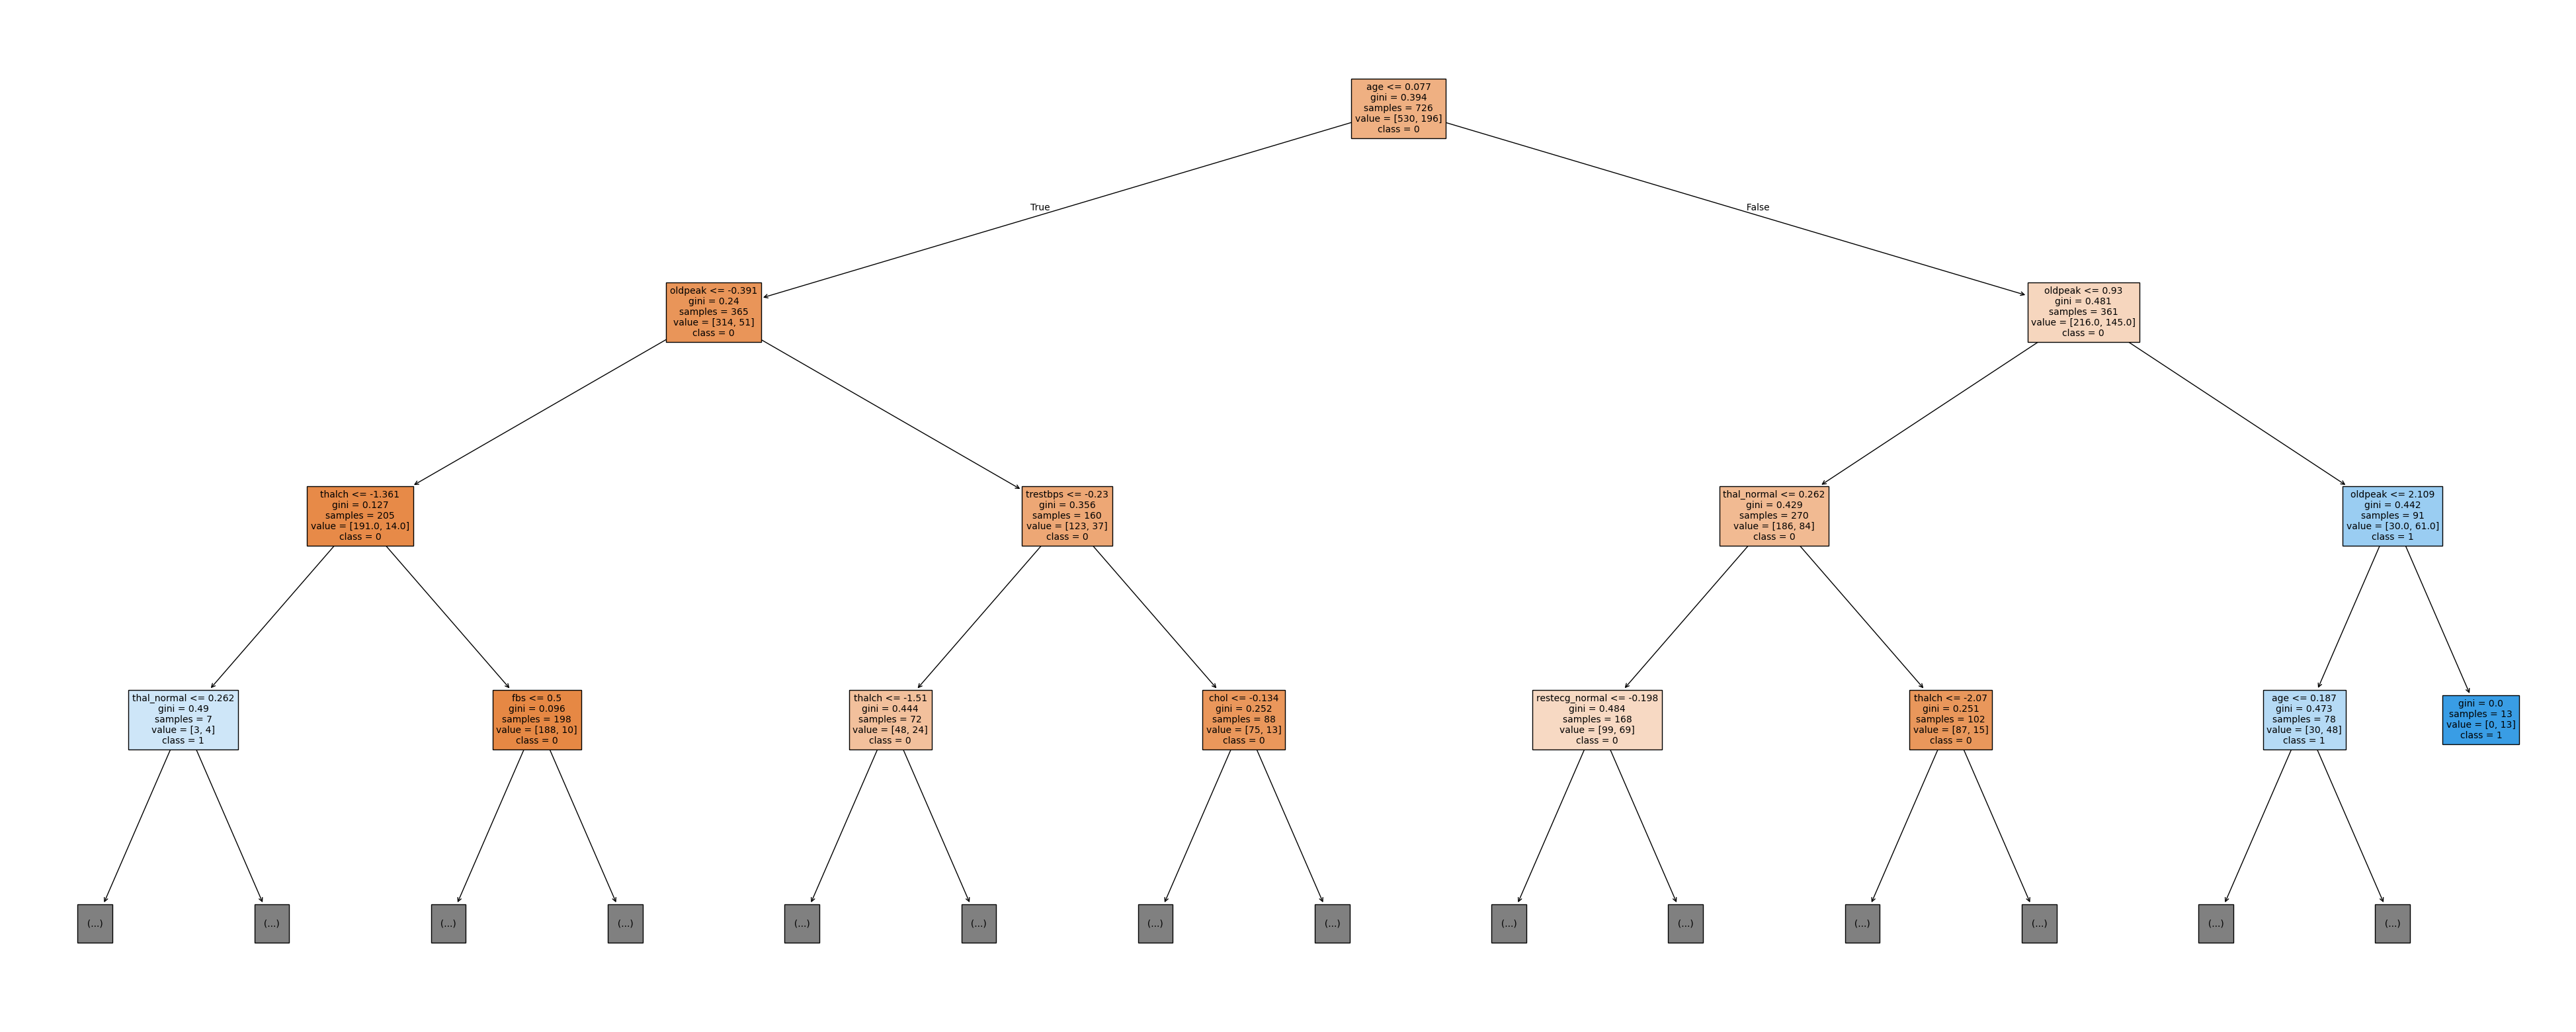

In [53]:
# graph visulazation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = [str(c) for c in sorted(y.unique())]

plt.figure(figsize=(50,20))
plot_tree( model, filled=True, feature_names=x.columns, class_names=class_names, max_depth=3, fontsize=10)
plt.show()

================= train =================


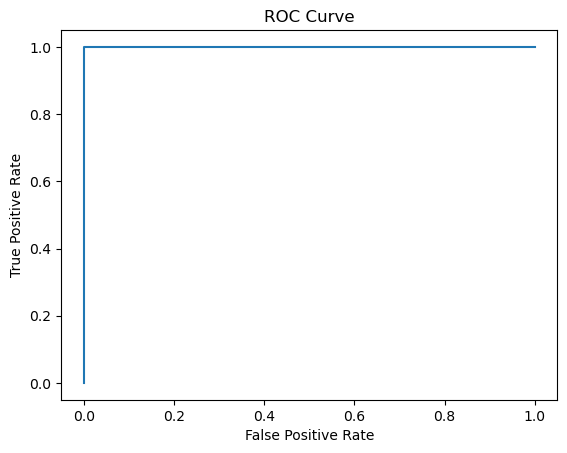

AUC Score: 1.0

 ================= test =================


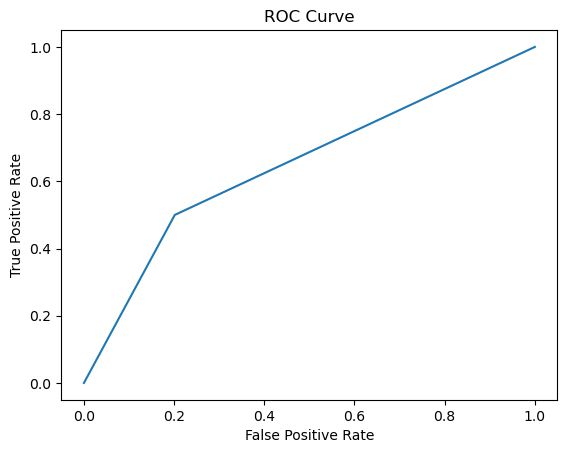

AUC Score: 0.6492537313432836


In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

print("================= train =================")
y_prob = model.predict_proba(x_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_train, y_prob))



print("\n ================= test =================")
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, y_prob))

In [ ]:
#                                                           5. Hyperparameter Tuning:

In [55]:
#  Hyperparameter Tuning (optional but important)

from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(model, params, cv=5)
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}



Train Accuracy: 0.7741046831955923

Test Accuracy: 0.7857142857142857

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.96      0.87       134
           1       0.71      0.31      0.43        48

    accuracy                           0.79       182
   macro avg       0.75      0.63      0.65       182
weighted avg       0.77      0.79      0.75       182


Best Decision Tree Model:
 DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)


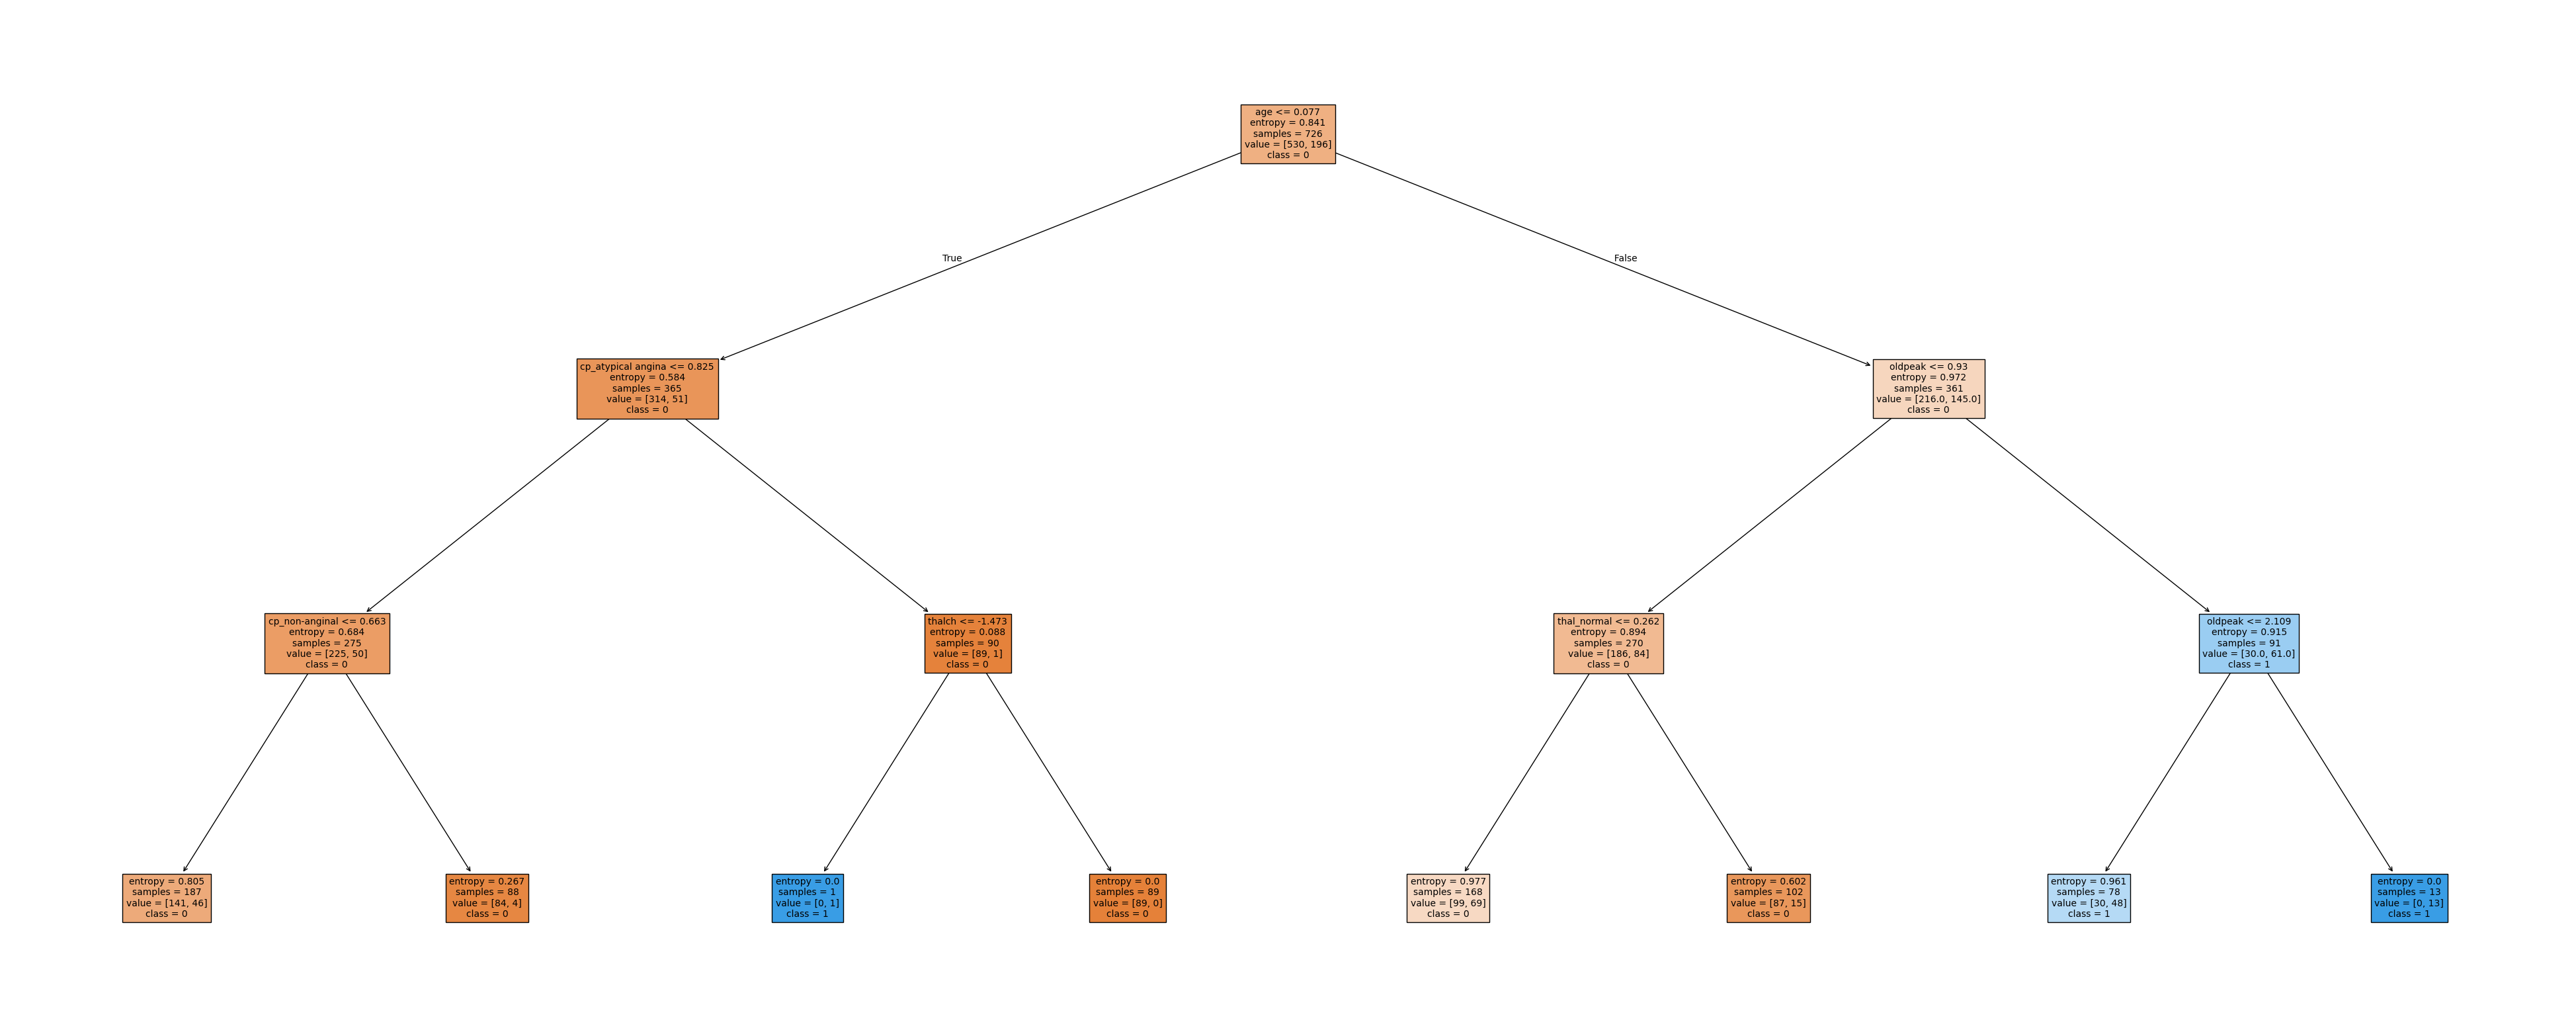

In [61]:
best_dt = grid.best_estimator_
y_pred = best_dt.predict(x_test)

print("\nTrain Accuracy:", accuracy_score(y_train, best_dt.predict(x_train)))
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:", classification_report(y_test, y_pred))

print("\nBest Decision Tree Model:\n", best_dt)

plt.figure(figsize=(50,20))
plot_tree(best_dt, filled=True, feature_names=x.columns, class_names=class_names, fontsize=10)
plt.show()


best_importances: 
 age                         0.344906
oldpeak                     0.252162
cp_atypical angina          0.124297
thal_normal                 0.116898
cp_non-anginal              0.103604
thalch                      0.058133
fbs                         0.000000
trestbps                    0.000000
slope                       0.000000
exang                       0.000000
chol                        0.000000
sex_Male                    0.000000
cp_typical angina           0.000000
restecg_normal              0.000000
restecg_st-t abnormality    0.000000
thal_reversable defect      0.000000
dtype: float64


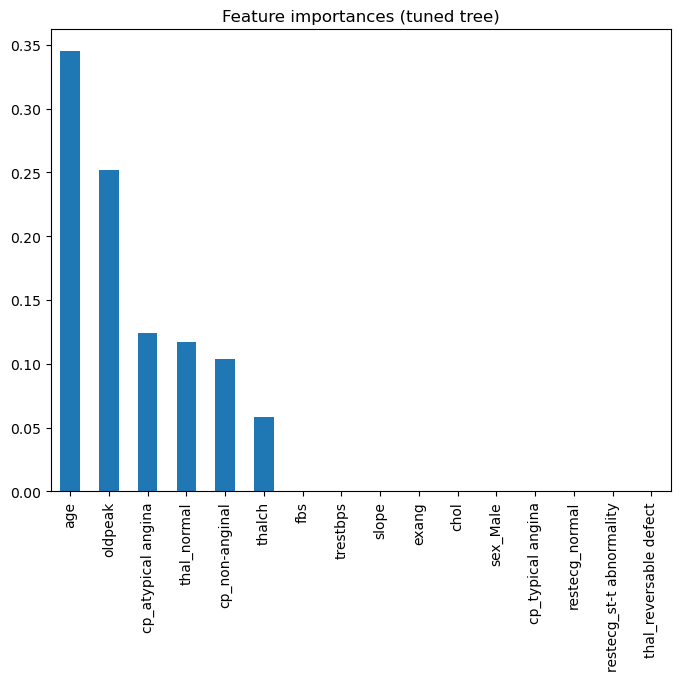

In [59]:
# important features for tuning the model
best_importances = pd.Series(best_dt.feature_importances_, index=x.columns).sort_values(ascending=False)
print("best_importances: \n",best_importances)

#imp features visualising
plt.figure(figsize=(8,6))
best_importances.plot(kind='bar')
plt.title("Feature importances (tuned tree)")
plt.show()

trianing accuracy: 0.778
test accuracy: 0.775

 Trianing classification report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.86       531
           1       0.72      0.29      0.41       195

    accuracy                           0.78       726
   macro avg       0.75      0.62      0.64       726
weighted avg       0.77      0.78      0.74       726


 Test classification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       133
           1       0.67      0.33      0.44        49

    accuracy                           0.77       182
   macro avg       0.73      0.63      0.65       182
weighted avg       0.76      0.77      0.75       182



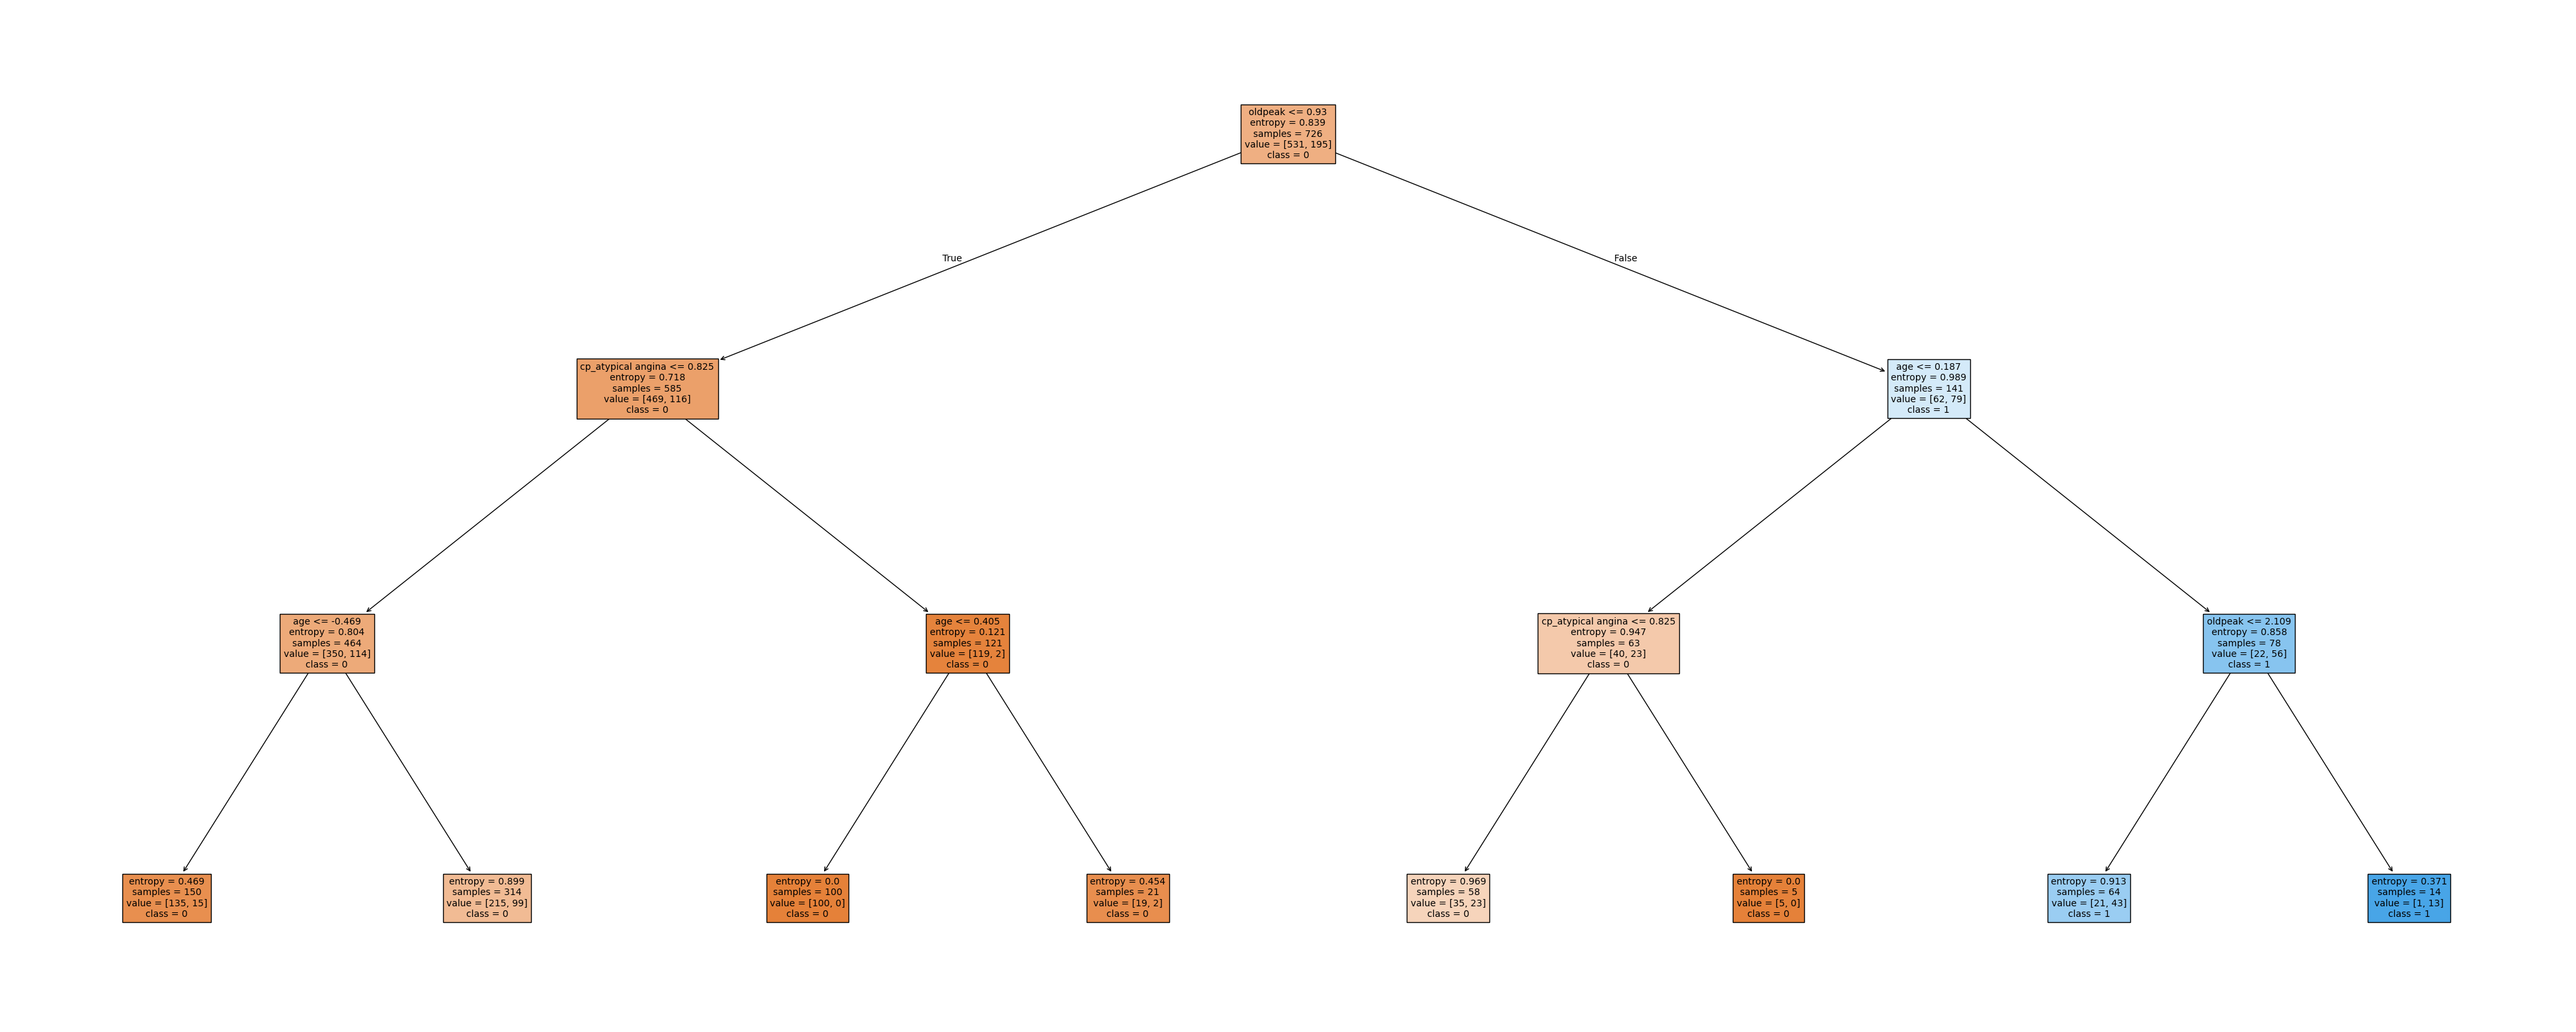

In [63]:
#based on important features 
#we are tuning the model for better accuracy

best_features = ['age', 'oldpeak', 'cp_atypical angina', 'thal_normal','cp_non-anginal', 'thalch']

x = data[best_features]
y = data['num']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42, stratify=y)

model_b = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
model_b.fit(x_train, y_train)

y_pred_train = model_b.predict(x_train)
y_pred_test = model_b.predict(x_test)


print("trianing accuracy:", np.round(accuracy_score(y_train,y_pred_train), 3))
print("test accuracy:", np.round(accuracy_score(y_test,y_pred_test), 3))
print("\n Trianing classification report:\n", classification_report(y_train,y_pred_train))
print("\n Test classification report:\n", classification_report(y_test,y_pred_test))

# graph visulazation
class_names = [str(c) for c in sorted(y_b.unique())]

plt.figure(figsize=(50,20))
plot_tree( model_b, filled=True, feature_names=x_b.columns, class_names=class_names, max_depth=3, fontsize=10)
plt.show()


In [68]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

dt = DecisionTreeClassifier(random_state=42)
#dt = DecisionTreeClassifier(class_weight="balanced",random_state=42)

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 6, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
}

grid = GridSearchCV(dt, params, cv=ShuffleSplit(n_splits = 50,test_size=0.2), scoring='accuracy')
grid.fit(x_train, y_train)

print("\nBest Score from CV:", grid.best_score_)
print("\nBest Params:", grid.best_params_)

best_dt = grid.best_estimator_
y_pred = best_dt.predict(x_test_b)

print("\nTrain Accuracy:", accuracy_score(y_train, best_dt.predict(x_train)))
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:", classification_report(y_test, y_pred))



Best Score from CV: 0.7595890410958904

Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Train Accuracy: 0.790633608815427

Test Accuracy: 0.7692307692307693

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.91      0.85       133
           1       0.61      0.39      0.47        49

    accuracy                           0.77       182
   macro avg       0.71      0.65      0.66       182
weighted avg       0.75      0.77      0.75       182



In [32]:
#                                                              6. Model Evaluation and Analysis:

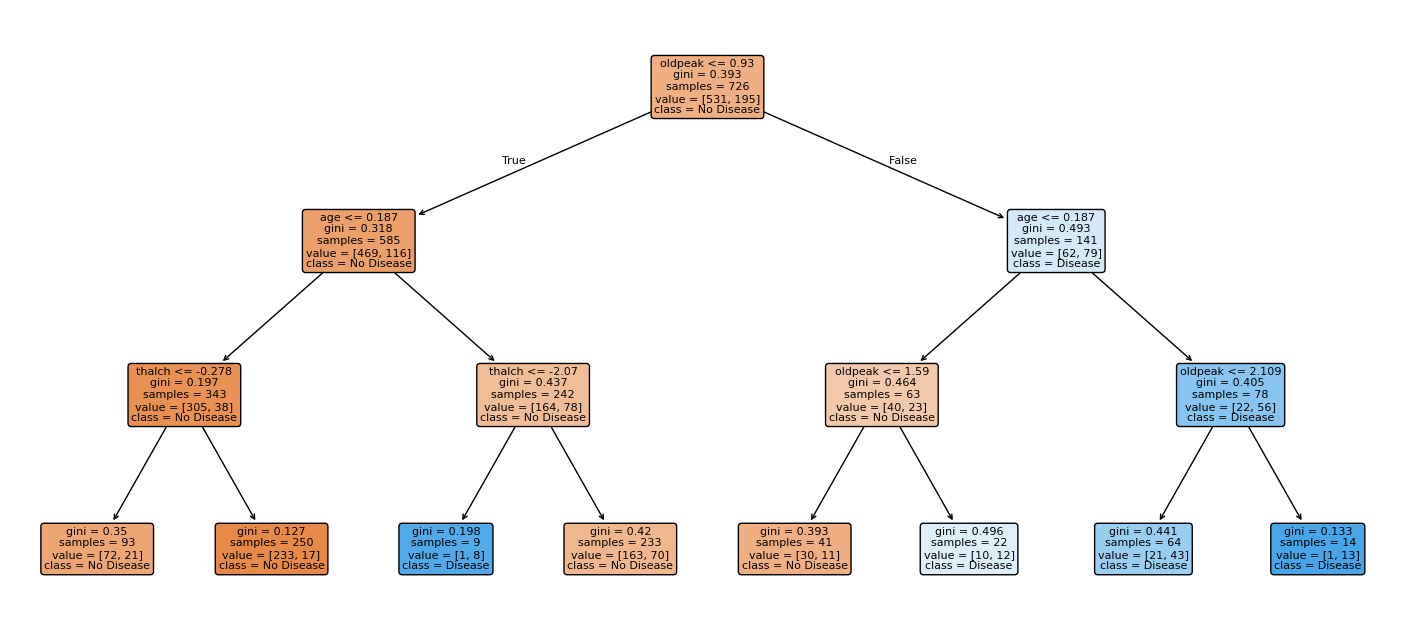

In [69]:
#  Visualize Tree

from sklearn.tree import plot_tree

plt.figure(figsize=(18,8))
plot_tree(best_dt,
          feature_names=x.columns, 
          filled=True,
          rounded=True, 
          class_names=['No Disease', 'Disease']
          ,fontsize=8)
plt.show()

In [ ]:
#                                    CONCLUSION

In [ ]:
'''After preprocessing, encoding, scaling, and binary conversion of the target variable,
the Decision Tree model performed well in classifying patients as having or not having heart disease.
The model can be further improved using tuning or ensemble techniques like Random Forest or Gradient Boosting'''

In [ ]:
"""
Interview Questions & Answers:


Q. What are some common hyperparameters of decision tree models, 
and how do they affect the model's performance?

Decision Tree hyperparameters control the structure of the tree and 
help prevent overfitting.

max_depth –> Controls how deep the tree can grow 
             Higher depth may overfit, lower depth may underfit

min_samples_split –> Minimum samples needed to split a node
                     Higher value → simpler tree

min_samples_leaf –> Minimum samples in leaf nodes 
                    Prevents tiny, overfitted leaves

criterion (Gini/Entropy) –> Measures impurity to choose the best split

By tuning these hyperparameters, we can improve model accuracy and 
achieve a good balance between overfitting and underfitting.


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Q. What is the difference between Label Encoding and One-Hot Encoding?

Label Encoding: Converts categories into numbers (0, 1, 2…)
➝ Best for ordered categories (ordinal data)

One-Hot Encoding: Creates separate binary columns for each category
➝ Best for unordered categories (nominal data)




"""
